In [76]:
import os

import numpy as np
import clustbench as cb
import pandas as pd
import sklearn.cluster as clst
import genieclust as gini
import matplotlib.pyplot as plt
import importlib

from matplotlib.pyplot import title

import plotter
import clusterizer
import Scorer
importlib.reload(plotter)

<module 'plotter' from 'C:\\Users\\18pep\\Documents\\sem_I\\DVaE\\clustering_dimensions_reduction\\clustering\\plotter.py'>

In [41]:
datasets=['a1','a2','a3','aggregation','compound','d31','r15','flame','jain','pathbased','spiral','s1','s2','s3','s4','unbalance']

In [44]:
a=0
for d in datasets:
    b = cb.load_dataset("sipu", d, path="./clustering-data-v1")
    print(d,":",len(b.labels))
    a+=len(b.labels)
a

a1 : 1
a2 : 1
a3 : 1
aggregation : 1
compound : 5
d31 : 1
r15 : 3
flame : 2
jain : 1
pathbased : 2
spiral : 1
s1 : 1
s2 : 1
s3 : 1
s4 : 1
unbalance : 1


24

In [45]:
models=[clst.KMeans(),gini.Genie(gini_threshold=0.1),
gini.Genie(gini_threshold=0.3),gini.Genie(gini_threshold=0.5),gini.Genie(gini_threshold=0.7),gini.Genie(gini_threshold=0.9),
    clst.AgglomerativeClustering(linkage='single'),clst.AgglomerativeClustering(linkage='complete')
    ,clst.AgglomerativeClustering(linkage='average'),clst.AgglomerativeClustering(linkage='ward'),clst.DBSCAN]

models_names=['KMeans','Genie_01','Genie_03','Genie_05','Genie_07','Genie_09',
              'Agglomerative_Clustering_single','Agglomerative_Clustering_complete','Agglomerative_Clustering_average',
              'Agglomerative_Clustering_ward','DBSCAN']


In [65]:
import comparer
importlib.reload(comparer)

<module 'comparer' from 'C:\\Users\\18pep\\Documents\\sem_I\\DVaE\\clustering_dimensions_reduction\\clustering\\comparer.py'>

In [67]:
b= cb.load_dataset("sipu", "flame", path="./clustering-data-v1")

In [69]:
b.n_clusters

array([2, 2])

res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]
res 1
dict_keys([2])
labels 2
n clust [2 2]


{'KMeans': [np.float64(0.7383367139959431)],
 'Genie_01': [np.float64(1.0)],
 'Genie_03': [np.float64(1.0)],
 'Genie_05': [np.float64(1.0)],
 'Genie_07': [np.float64(1.0)],
 'Genie_09': [np.float64(0.02298850574712641)],
 'Agglomerative_Clustering_single': [np.float64(0.02298850574712641)],
 'Agglomerative_Clustering_complete': [np.float64(0.17962587333784086)],
 'Agglomerative_Clustering_average': [np.float64(0.738562091503268)],
 'Agglomerative_Clustering_ward': [np.float64(0.5620915032679739)],
 'DBSCAN': [0.02298850574712641]}

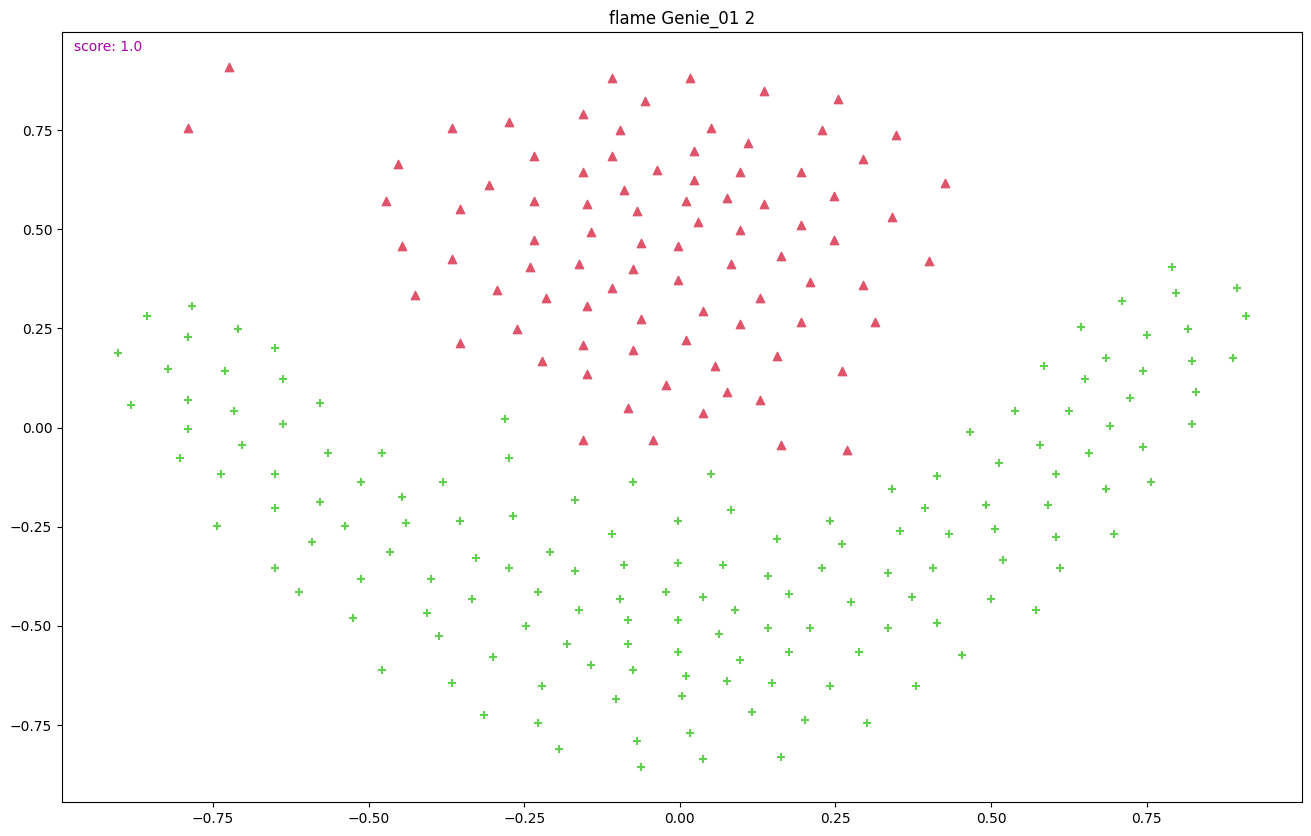

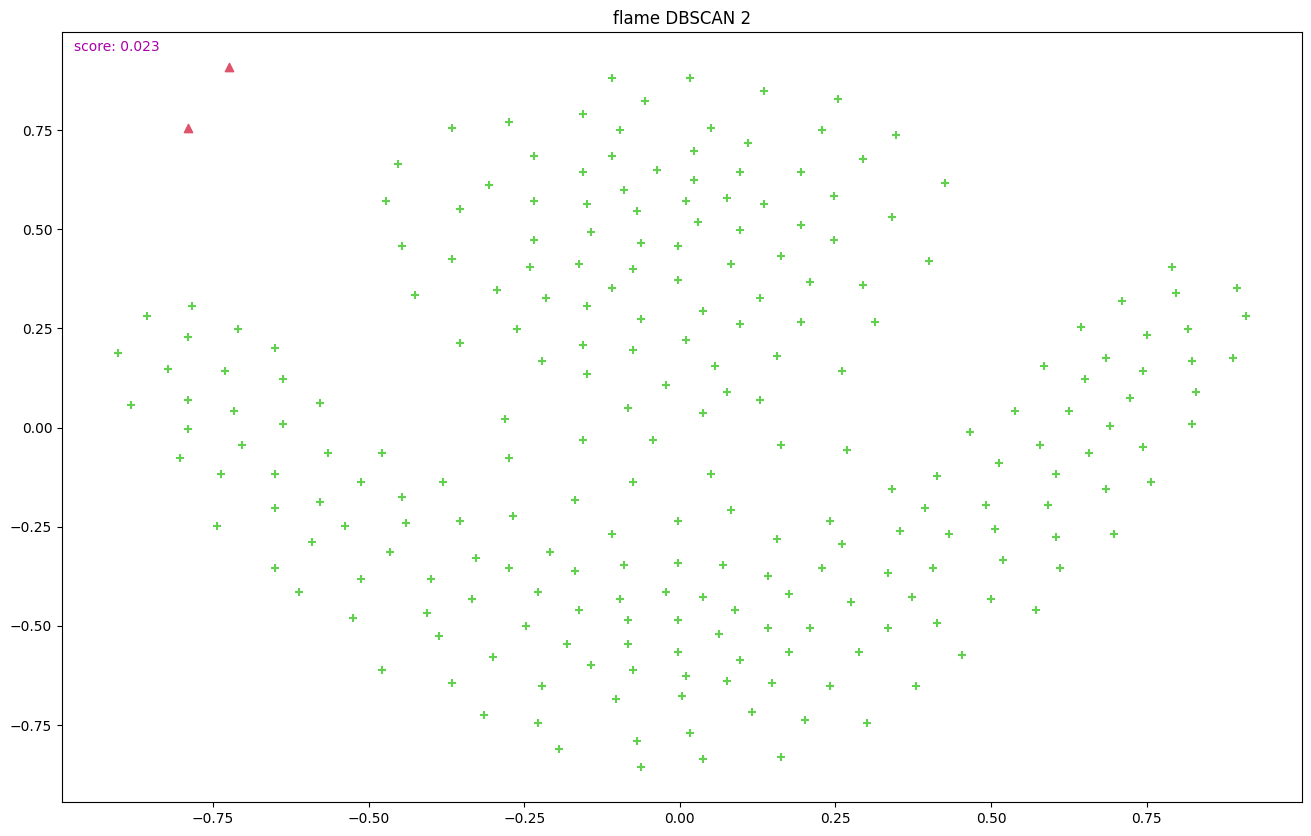

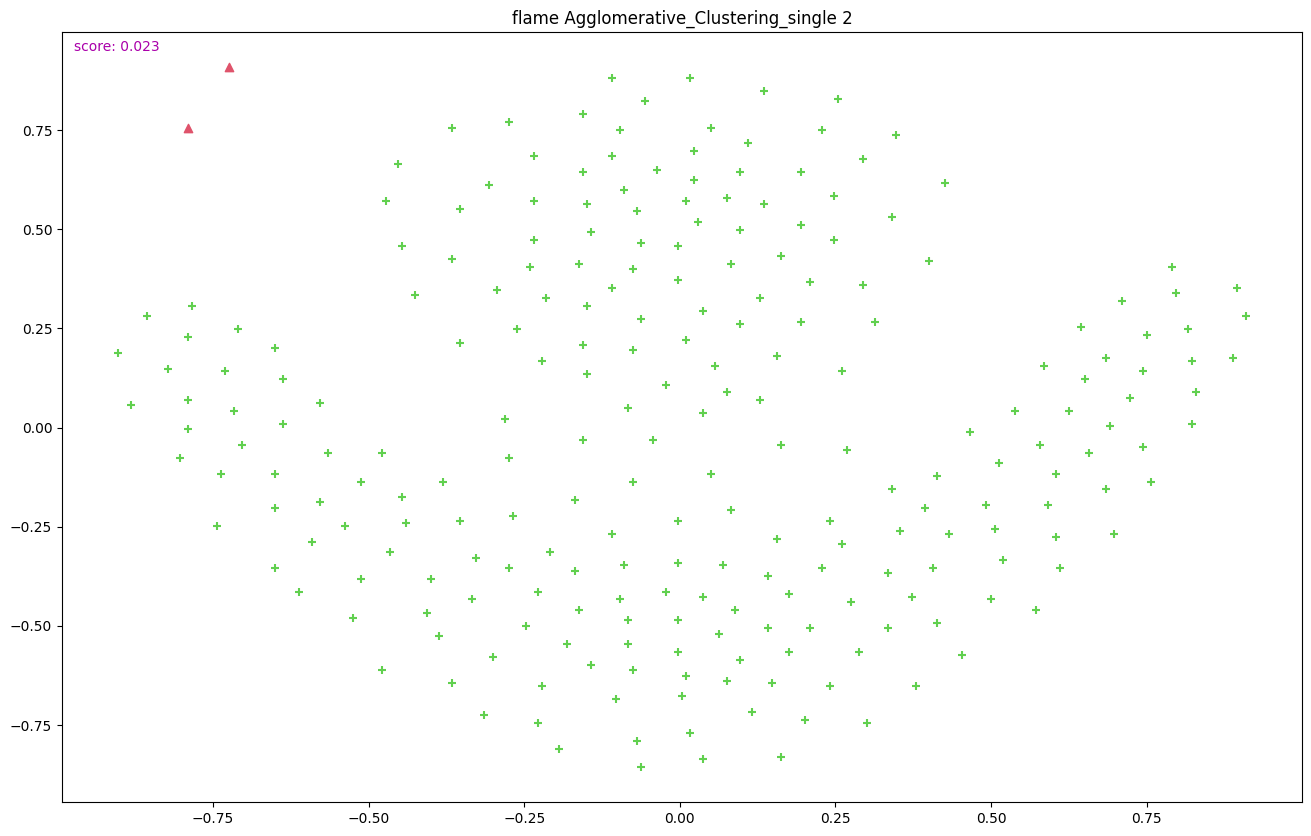

In [66]:
comparer.comparison_for_dataset("flame",models,models_names)

In [30]:
for d in datasets:
    b = cb.load_dataset("sipu", d, path="./clustering-data-v1")
    print(b.data.shape)

(3000, 2)
(5250, 2)
(7500, 2)
(788, 2)
(100000, 2)
(100000, 2)
(399, 2)
(3100, 2)
(600, 2)
(240, 2)
(373, 2)
(300, 2)
(312, 2)
(5000, 2)
(5000, 2)
(5000, 2)
(5000, 2)
(6500, 2)


In [28]:
b.data.shape

(399, 2)

In [ ]:
a

In [71]:
import utils
importlib.reload(utils)
for d in datasets:
    utils.figure_to_tex("clusters",d)

['a1.png', 'a1a_results.txt', 'a1_Agglomerative_Clustering_single.png', 'a1_DBSCAN.png', 'a1_Genie_01.png', 'a2.png', 'a2a_results.txt', 'a2_Agglomerative_Clustering_single.png', 'a2_DBSCAN.png', 'a2_Genie_01.png', 'a3.png', 'a3a_results.txt', 'a3_Agglomerative_Clustering_single.png', 'a3_DBSCAN.png', 'a3_Genie_01.png', 'aggregation.png', 'aggregationa_results.txt', 'aggregation_Agglomerative_Clustering_average.png', 'aggregation_DBSCAN.png', 'aggregation_Genie_03.png', 'compound.png', 'compounda_results.txt', 'compound_Agglomerative_Clustering_single.png', 'compound_DBSCAN.png', 'compound_Genie_03.png', 'd31.png', 'd31a_results.txt', 'd31_Agglomerative_Clustering_single.png', 'd31_DBSCAN.png', 'd31_KMeans.png', 'flame.png', 'flamea_results.txt', 'flame_Agglomerative_Clustering_single.png', 'flame_DBSCAN.png', 'flame_Genie_01.png', 'jain.png', 'jaina_results.txt', 'jain_Agglomerative_Clustering_single.png', 'jain_DBSCAN.png', 'jain_Genie_03.png', 'pathbased.png', 'pathbaseda_results.tx

C:\Users\18pep\Documents\sem_I\DVaE\clustering_dimensions_reduction\clustering\utils.py:7: SyntaxWarning: invalid escape sequence '\i'
  base=""" \\begin{{frame}}{{}}


In [72]:
import json

In [77]:
with open("agg_data/aggregated_results.json") as f:
    data=json.load(f)
df=pd.DataFrame(data)

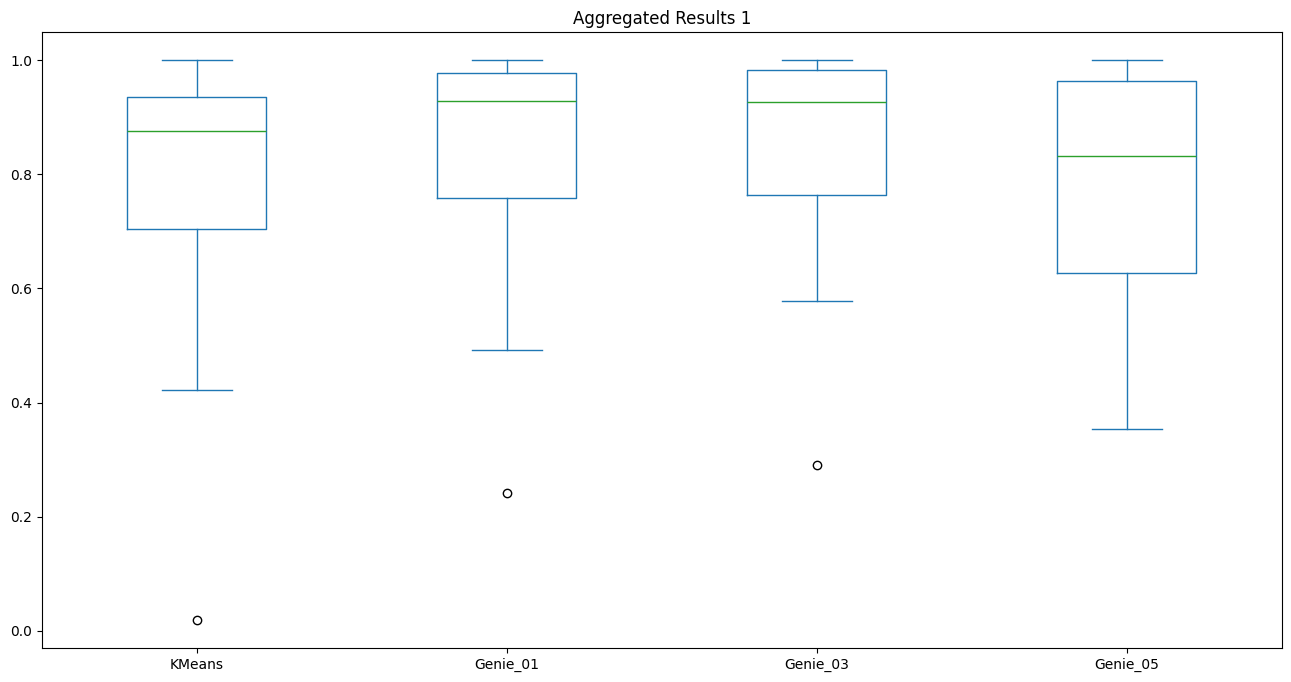

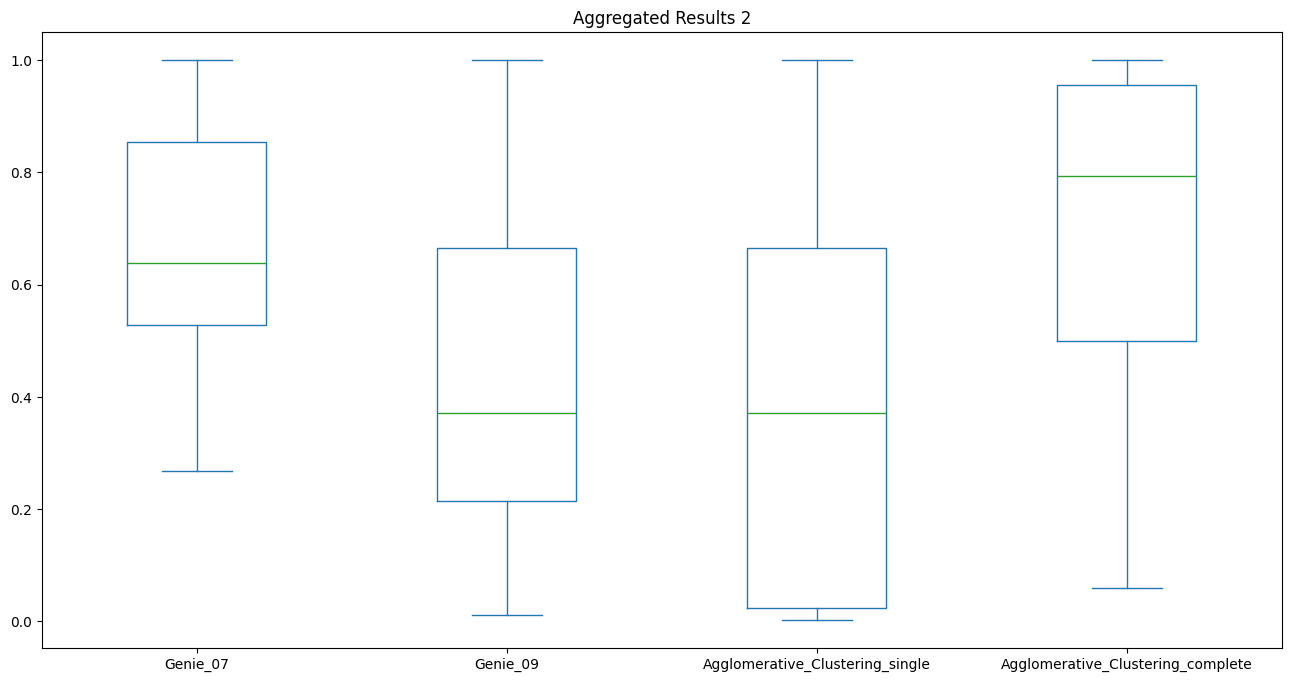

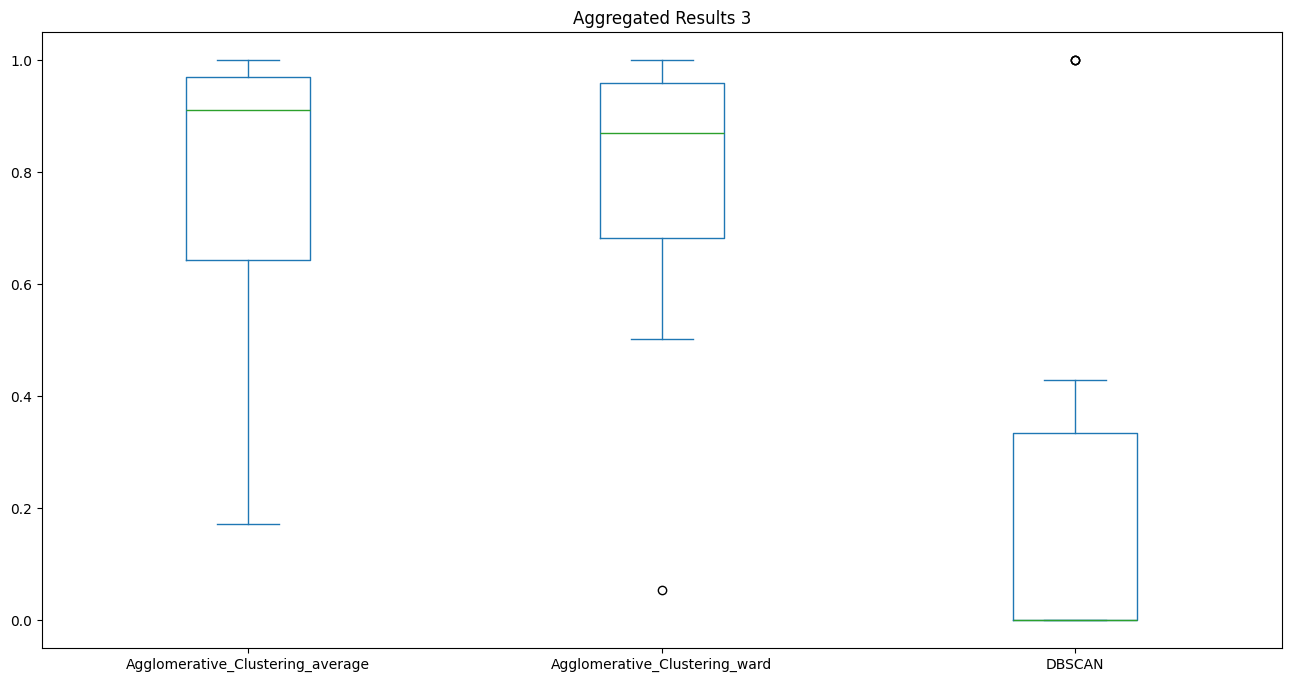

In [87]:
b=0
e=4
s=4
it=1
while b<11:
    df1=df.iloc[:,b:e]
    df1.plot(kind="box",figsize=(16,8),title=f"Aggregated Results {it}",fontsize=10)
    plt.savefig("agg_data/agg"+str(it)+".png", dpi=300, bbox_inches='tight')
    it+=1
    b+=s
    e+=s

In [91]:
importlib.reload(utils)

['a1.png', 'a1a_results.txt', 'a1_Agglomerative_Clustering_single.png', 'a1_DBSCAN.png', 'a1_Genie_01.png', 'a2.png', 'a2a_results.txt', 'a2_Agglomerative_Clustering_single.png', 'a2_DBSCAN.png', 'a2_Genie_01.png', 'a3.png', 'a3a_results.txt', 'a3_Agglomerative_Clustering_single.png', 'a3_DBSCAN.png', 'a3_Genie_01.png', 'aggregation.png', 'aggregationa_results.txt', 'aggregation_Agglomerative_Clustering_average.png', 'aggregation_DBSCAN.png', 'aggregation_Genie_03.png', 'compound.png', 'compounda_results.txt', 'compound_Agglomerative_Clustering_single.png', 'compound_DBSCAN.png', 'compound_Genie_03.png', 'd31.png', 'd31a_results.txt', 'd31_Agglomerative_Clustering_single.png', 'd31_DBSCAN.png', 'd31_KMeans.png', 'flame.png', 'flamea_results.txt', 'flame_Agglomerative_Clustering_single.png', 'flame_DBSCAN.png', 'flame_Genie_01.png', 'jain.png', 'jaina_results.txt', 'jain_Agglomerative_Clustering_single.png', 'jain_DBSCAN.png', 'jain_Genie_03.png', 'pathbased.png', 'pathbaseda_results.tx

C:\Users\18pep\Documents\sem_I\DVaE\clustering_dimensions_reduction\clustering\utils.py:5: SyntaxWarning: invalid escape sequence '\i'
  
C:\Users\18pep\Documents\sem_I\DVaE\clustering_dimensions_reduction\clustering\utils.py:20: SyntaxWarning: invalid escape sequence '\i'
  with open(o,"a") as o:


<module 'utils' from 'C:\\Users\\18pep\\Documents\\sem_I\\DVaE\\clustering_dimensions_reduction\\clustering\\utils.py'>

In [92]:
utils.fig_to_tex("agg_data")

generating agg1.png
generating agg2.png
generating agg3.png
